In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [68]:
os.environ['NEURITE_BACKEND'] = 'pytorch'
os.environ['VXM_BACKEND'] = 'pytorch'
import voxelmorph as vxm


In [69]:
# Load the images
original_image = np.load('/home-local/rudravg/test_DAPI/testing_it_out/original_image.npy')
target_image = np.load('/home-local/rudravg/test_DAPI/testing_it_out/moved_img.npy')

# Calculate the ratio
ratio = np.where(target_image != 0, original_image / target_image, 0)

/tmp/ipykernel_1338211/3015941747.py:6: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)
/tmp/ipykernel_1338211/3015941747.py:6: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)


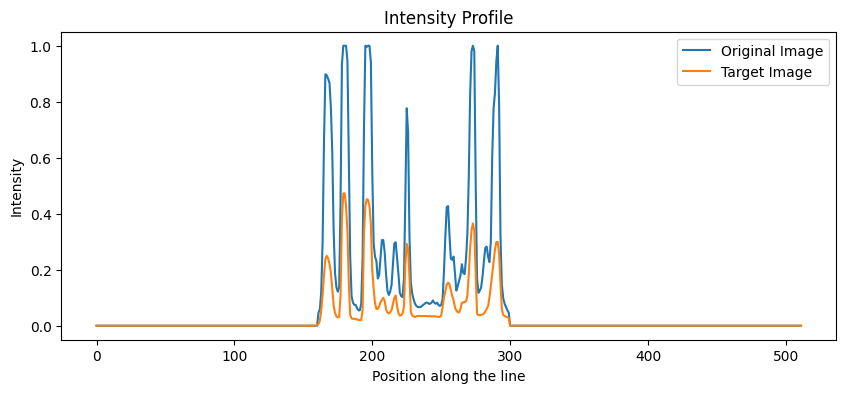

In [70]:
# Define the line for the intensity profile
x = np.linspace(0, original_image.shape[1] - 1, original_image.shape[1])
y = np.full(original_image.shape[1], original_image.shape[0] // 2)

# Get the intensities along the line in the original and target images
original_intensities = original_image[y.astype(int), x.astype(int)]
target_intensities = target_image[y.astype(int), x.astype(int)]

# Create the intensity profiles
plt.figure(figsize=(10, 4))
plt.plot(x, original_intensities, label='Original Image')
plt.plot(x, target_intensities, label='Target Image')
plt.title('Intensity Profile')
plt.xlabel('Position along the line')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [71]:
# Calculate the ratio
ratio = np.where(target_image != 0, original_image / target_image, 0)

# Calculate the mean ratio for non-zero pixels
factor = ratio[ratio != 0].mean()

print("The factor is:", factor)

The factor is: 3.4225255673216064


/tmp/ipykernel_1338211/4010209824.py:2: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)
/tmp/ipykernel_1338211/4010209824.py:2: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)


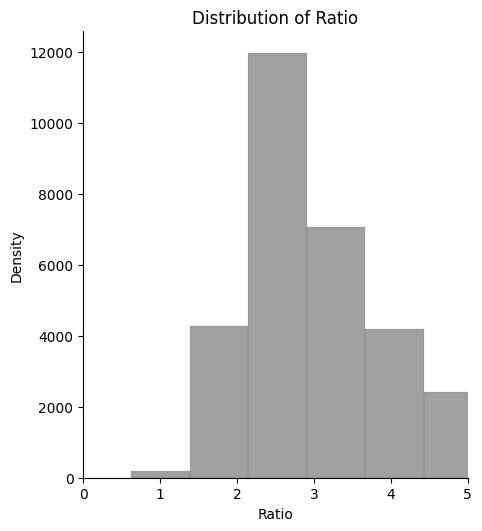

In [72]:
import seaborn as sns

# Plot the distribution of the ratio
sns.displot(ratio[ratio != 0].ravel(), bins=500, color='gray')
plt.title('Distribution of Ratio')
plt.xlabel('Ratio')
plt.ylabel('Density')
plt.xlim(0, 5)
plt.show()

In [73]:
#Take the mean of all values in ratio > 0 and <5
factor_2 = np.mean(ratio[(ratio > 0) & (ratio < 5)])
factor_2

2.959002886823583

In [74]:
from scipy import stats

# Calculate the mode of the non-zero pixels in the ratio
mode_ratio = stats.mode(ratio[ratio != 0].ravel())

print('The most frequently occurring value in the ratio is:', mode_ratio)

The most frequently occurring value in the ratio is: ModeResult(mode=3.999999921768905, count=109)


In [75]:
factor

3.4225255673216064

In [77]:
# Calculate the histogram of the ratios
counts, bins = np.histogram(ratio[ratio != 0].ravel(), bins=255)

# Find the bin with the highest count
max_count_index = np.argmax(counts)

# Get the start and end of the bin
start = bins[max_count_index]
end = bins[max_count_index + 1]

# Get the ratios in the bin
ratios_in_bin = ratio[(ratio > start) & (ratio < end)]

# Calculate the mean of the ratios in the bin
mean_ratio = ratios_in_bin.mean()

print('The mean of the ratios in the most dense interval is:', mean_ratio)

The mean of the ratios in the most dense interval is: 2.7525868666087105


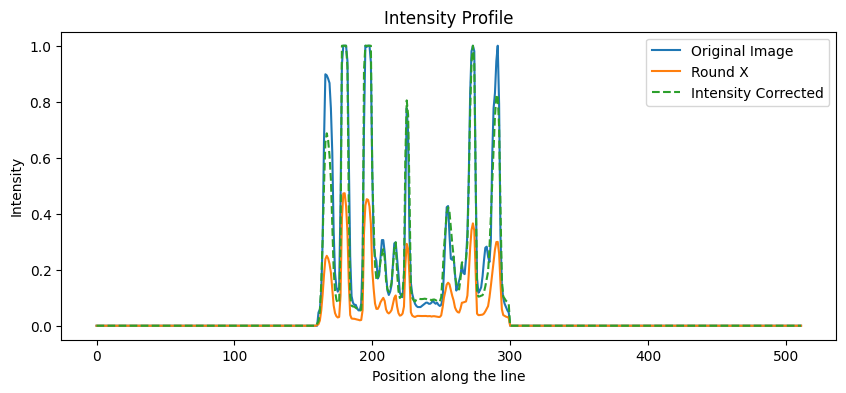

In [78]:
# Create a new image by multiplying the target image by the factor
new_image = target_image * mean_ratio

# Limit the pixel values to the maximum value in the original image
new_image_1 = np.minimum(new_image, original_image.max())

# Get the intensities along the line in the new image
new_intensities = new_image_1[y.astype(int), x.astype(int)]

# Create the intensity profiles
plt.figure(figsize=(10, 4))
plt.plot(x, original_intensities, label='Original Image', alpha=1)
plt.plot(x, target_intensities, label='Round X', alpha=1)
plt.plot(x, new_intensities, label='Intensity Corrected', alpha=1, linestyle='--')
plt.title('Intensity Profile')
plt.xlabel('Position along the line')
plt.ylabel('Intensity')
plt.legend()
plt.show()

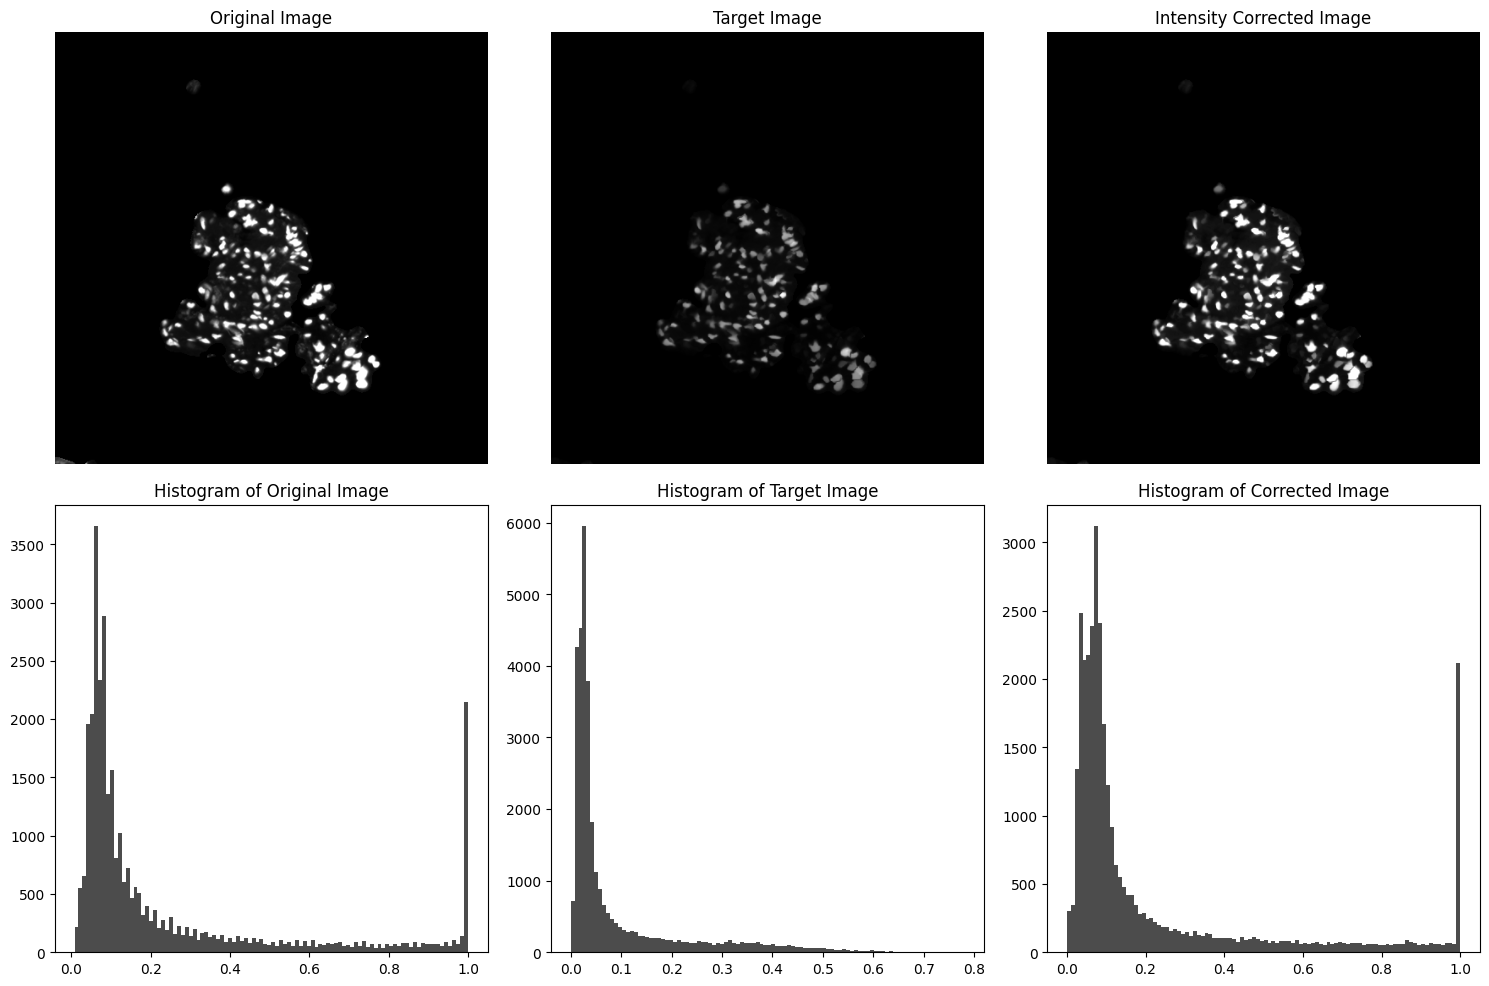

In [80]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(target_image, cmap='gray')
axs[0, 1].set_title('Target Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(new_image_1, cmap='gray',vmax=1)
axs[0, 2].set_title('Intensity Corrected Image')
axs[0, 2].axis('off')

axs[1, 0].hist(original_image[original_image > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 0].set_title('Histogram of Original Image')

axs[1, 1].hist(target_image[target_image > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 1].set_title('Histogram of Target Image')

axs[1, 2].hist(new_image_1[new_image_1 > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 2].set_title('Histogram of Corrected Image')

plt.tight_layout()
plt.show()

In [81]:
#Save new image 1 as a numpy file and a png
np.save('/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_image.npy', new_image_1)
plt.imsave('/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_image.png', new_image_1, cmap='gray')

In [ ]:
#Calculate NCC between original and corrected image


In [7]:
#Save new_image_1 as a numpy array
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [ ]:
# Calculate the ratio matrix
ratio_matrix = np.where(target_image != 0, original_image / target_image, 0)

# Divide the ratio matrix by the target image
matched_image = np.where(target_image != 0, ratio_matrix * target_image, 0)

# Limit the pixel values to the maximum value in the original image
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(target_image, cmap='gray')
axs[0, 1].set_title('Target Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(matched_image, cmap='gray',vmax=1)
axs[0, 2].set_title('Intensity Corrected Image')
axs[0, 2].axis('off')

axs[1, 0].hist(original_image[original_image > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 0].set_title('Histogram of Original Image')

axs[1, 1].hist(target_image[target_image > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 1].set_title('Histogram of Target Image')

axs[1, 2].hist(matched_image[matched_image > 0].ravel(), bins=100, color='black', alpha=0.7)
axs[1, 2].set_title('Histogram of Corrected Image')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def calculate_ncc(array1, array2):
    # Normalize the arrays
    array1 = (array1 - np.mean(array1)) / (np.std(array1) * len(array1))
    array2 = (array2 - np.mean(array2)) / (np.std(array2))

    # Calculate the cross-correlation
    ncc = np.correlate(array1, array2)

    return ncc

In [2]:
fix_file=np.load('/home-local/rudravg/test_DAPI/testing_it_out/original_image.npy')
mov_file=np.load('/home-local/rudravg/test_DAPI/testing_it_out/corrected_img.npy')
calculate_ncc(fix_file.ravel(), mov_file.ravel())

array([0.96700061])

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
best_model_path='/home-local/rudravg/test_DAPI/epochs/epoch_35/epoch_35.pth'
best_model=vxm.networks.VxmDense.load(best_model_path, device)
best_model.to(device)
best_model.eval()

NameError: name 'torch' is not defined

In [6]:
from tqdm import tqdm
from my_utils import Utils
before_reg=[]
after_reg=[]
adjusted_ncc=[]

# Open the file
with open('/home-local/rudravg/test_DAPI/new_val_pairs.txt', 'r') as f:
    # Read the lines
    lines = f.readlines()

# Iterate over the lines
for line in tqdm(lines):
    # Split the line into moving_file and fixed_file
    moving_file, fixed_file = line.strip().split(' ')
    moving_image = (np.load(moving_file))/255.0
    fixed_image = (np.load(fixed_file))/255.0
    np.save('/home-local/rudravg/test_DAPI/testing_it_out_2/moving_image.npy', moving_image)
    np.save('/home-local/rudravg/test_DAPI/testing_it_out_2/fixed_image.npy', fixed_image)
    mov_file='/home-local/rudravg/test_DAPI/testing_it_out_2/moving_image.npy'
    fix_file='/home-local/rudravg/test_DAPI/testing_it_out_2/fixed_image.npy'
    moving=vxm.py.utils.load_volfile(mov_file,add_batch_axis=True,add_feat_axis=True)
    fixed,fixed_affine=vxm.py.utils.load_volfile(fix_file,add_batch_axis=True,add_feat_axis=True,ret_affine=True)
    input_moving=torch.from_numpy(moving).to(device).float().permute(0,3,1,2)
    input_fixed=torch.from_numpy(fixed).to(device).float().permute(0,3,1,2)
    ncc_val_before=calculate_ncc(input_fixed.detach().cpu().numpy().ravel(), input_moving.detach().cpu().numpy().ravel())
    before_reg.append(abs(ncc_val_before))
    moved,warp=best_model(input_moving,input_fixed,registration=True)
    moved_np = moved.detach().cpu().numpy()
    adjusted_moved = Utils.adjust_intensity(input_fixed.detach().cpu().numpy(), moved_np)
    ncc_val_after=calculate_ncc(input_fixed.detach().cpu().numpy().ravel(), moved_np.ravel())
    after_reg.append(abs(ncc_val_after))
    ncc_val_adjusted = calculate_ncc(input_fixed.detach().cpu().numpy().ravel(), adjusted_moved.ravel())
    adjusted_ncc.append(abs(ncc_val_adjusted))

  0%|          | 0/94 [00:00<?, ?it/s]/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/voxelmorph-dev/my_utils.py:8: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)
/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/voxelmorph-dev/my_utils.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)
100%|██████████| 94/94 [00:03<00:00, 30.50it/s]


In [7]:
len(before_reg), len(after_reg), len(adjusted_ncc)

(94, 94, 94)

In [12]:
print(np.ndim(adjusted_ncc))

2


In [21]:
# Convert each numpy array in the list to a native Python type
before_reg = [item.item() for item in before_reg]
after_reg = [item.item() for item in after_reg]
adjusted_ncc = [item.item() for item in adjusted_ncc]


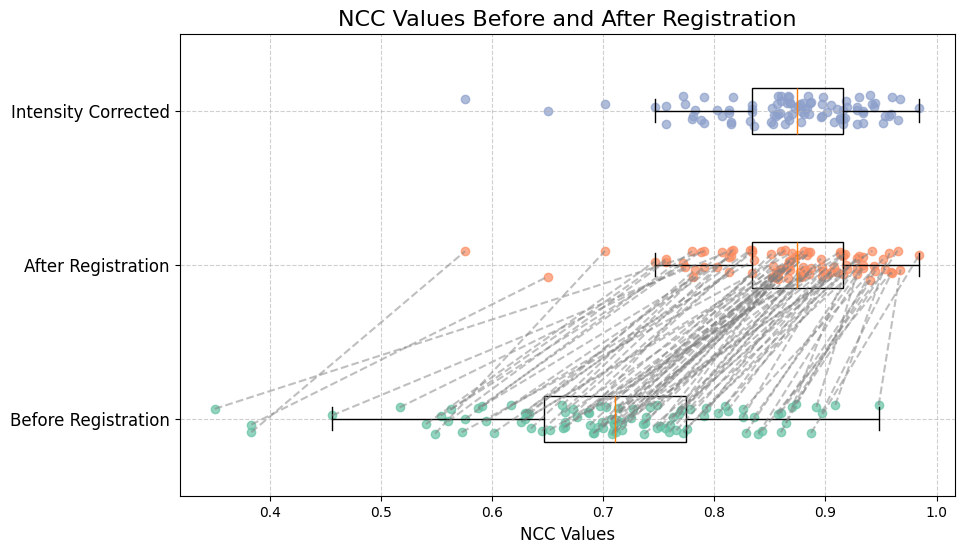

In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def jitter(values, width=0.1):
    """
    Add random jitter to values for better visualization.
    """
    return values + np.random.uniform(-width, width, size=len(values))

# Add jitter to the y-coordinates for better visualization of individual points
y_before_reg = jitter(np.repeat(1, len(before_reg)), 0.1)
y_after_reg = jitter(np.repeat(2, len(after_reg)), 0.1)
y_adjusted_ncc = jitter(np.repeat(3, len(adjusted_ncc)), 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot with transparency and without outliers
bp = ax.boxplot([before_reg, after_reg, adjusted_ncc], vert=False, patch_artist=True, sym='')

for patch in bp['boxes']:
    patch.set_facecolor('none')  # make box plot transparent

# Add individual points with jitter on the plot
colors = sns.color_palette("Set2")
ax.scatter(before_reg, y_before_reg, color=colors[0], alpha=0.7)
ax.scatter(after_reg, y_after_reg, color=colors[1], alpha=0.7)
ax.scatter(adjusted_ncc, y_adjusted_ncc, color=colors[2], alpha=0.7)

# Draw correspondence lines between before and after registration points
for i in range(len(before_reg)):
    ax.plot([before_reg[i], after_reg[i]], [y_before_reg[i], y_after_reg[i]], color='gray', linestyle='--', alpha=0.5)

# Set the y-axis labels
ax.set_yticklabels(['Before Registration', 'After Registration', 'Intensity Corrected'], fontsize=12)

# Set the x-axis label
ax.set_xlabel('NCC Values', fontsize=12)

# Set the title
ax.set_title('NCC Values Before and After Registration', fontsize=16)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [31]:
#Print mean of the three sets
print('Mean of Before Registration:', np.mean(before_reg))
print('Mean of After Registration:', np.mean(after_reg))
print('Mean of Intensity Corrected:', np.mean(adjusted_ncc))

Mean of Before Registration: 0.7082051704538629
Mean of After Registration: 0.8669211369879702
Mean of Intensity Corrected: 0.8669211522061774


In [ ]:
len(after_reg),len(adjusted_ncc),len(before_reg)

In [65]:
from my_utils import Utils
fix_img=np.load('/home-local/rudravg/test_DAPI/testing_it_out_2/moving_image.npy')
mov_img=np.load('/home-local/rudravg/test_DAPI/testing_it_out/fixed_image.npy')
intensity_corrected_img=Utils.adjust_intensity(mov_img,fix_img)

/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/voxelmorph-dev/my_utils.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(target_image != 0, original_image / target_image, 0)


In [63]:
#Save the intensity corrected image
np.save('/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_img.npy', intensity_corrected_img)
#Save it as a png
plt.imsave('/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_img.png', intensity_corrected_img, cmap='gray')

In [83]:
#Calculate the NCC value between the fixed and intensity corrected image
fix_file='/home-local/rudravg/test_DAPI/testing_it_out/original_image.npy'
mov_file='/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_image.npy'
calculate_ncc(np.load(fix_file).ravel(), np.load(mov_file).ravel())

array([0.96700061])

In [84]:
fix_file='/home-local/rudravg/test_DAPI/testing_it_out/original_image.npy'
mov_file='/home-local/rudravg/test_DAPI/testing_it_out/intensity_corrected_image.npy'

moving=vxm.py.utils.load_volfile(mov_file,add_batch_axis=True,add_feat_axis=True)
fixed,fixed_affine=vxm.py.utils.load_volfile(fix_file,add_batch_axis=True,add_feat_axis=True,ret_affine=True)
input_moving=torch.from_numpy(moving).to(device).float().permute(0,3,1,2)
input_fixed=torch.from_numpy(fixed).to(device).float().permute(0,3,1,2)
#Registering from Round 0 to Round X
moved1,warp1=best_model(input_moving,input_fixed,registration=True)
moved_np1 = moved1.detach().cpu().numpy()
warp1=warp1.detach().cpu().numpy()

#Registering from Round X to Round 0
moved2,warp2=best_model(input_fixed,input_moving,registration=True)
moved_np2 = moved2.detach().cpu().numpy()
warp2=warp2.detach().cpu().numpy()


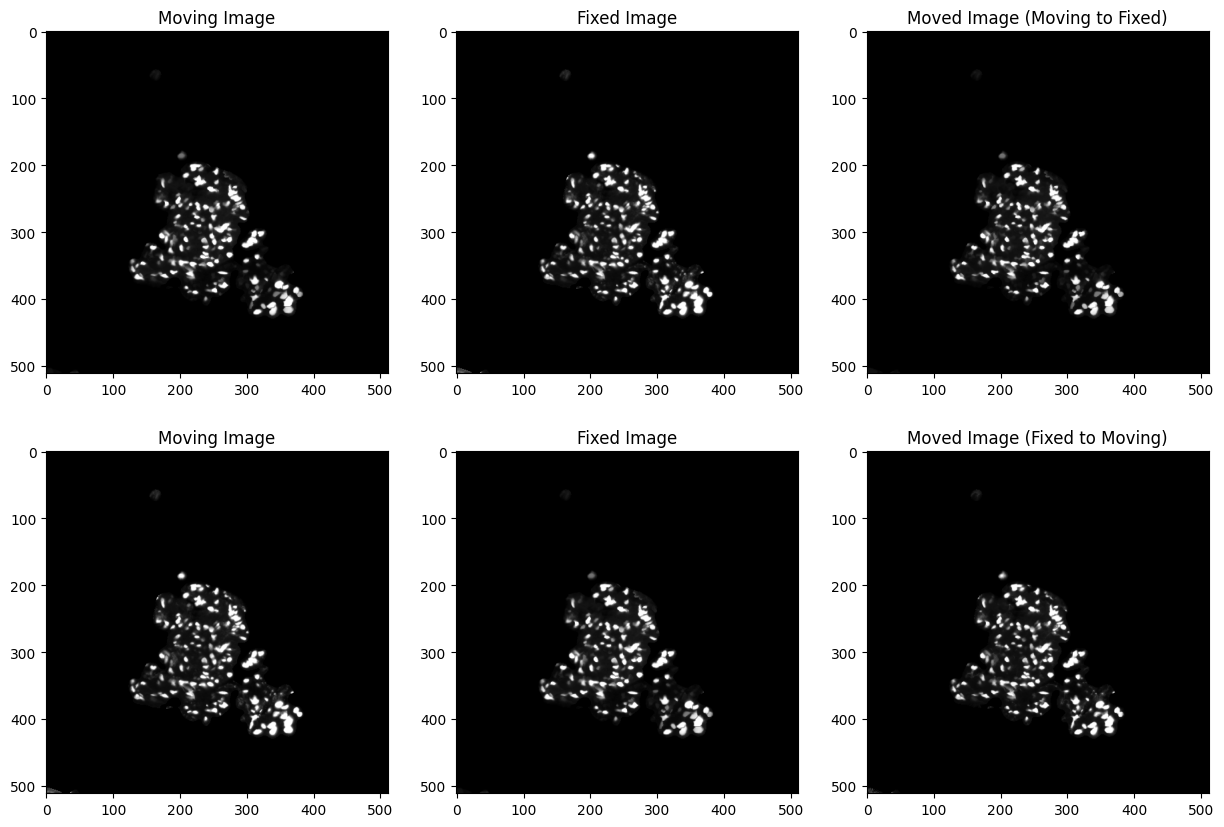

In [86]:
moving = np.squeeze(moving)
fixed = np.squeeze(fixed)
moved_np1 = np.squeeze(moved_np1)
moved_np2 = np.squeeze(moved_np2)

# Create a new figure with a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display the images
axs[0, 0].imshow(moving, cmap='gray')
axs[0, 1].imshow(fixed, cmap='gray')
axs[0, 2].imshow(moved_np1, cmap='gray')
axs[1, 0].imshow(fixed, cmap='gray')
axs[1, 1].imshow(moving, cmap='gray')
axs[1, 2].imshow(moved_np2, cmap='gray')

# Set the titles
axs[0, 0].set_title('Moving Image')
axs[0, 1].set_title('Fixed Image')
axs[0, 2].set_title('Moved Image (Moving to Fixed)')
axs[1, 0].set_title('Moving Image')
axs[1, 1].set_title('Fixed Image')
axs[1, 2].set_title('Moved Image (Fixed to Moving)')

for ax in axs.flat:
    ax.grid(False)

plt.show()

In [87]:
#Save moved_np1 and moved_np2 as numpy arrays
np.save('/home-local/rudravg/test_DAPI/testing_it_out/moved_np1v1.npy', moved_np1)
np.save('/home-local/rudravg/test_DAPI/testing_it_out/moved_np2v1.npy', moved_np2)

In [88]:
moved_np1 = vxm.py.utils.load_volfile('/home-local/rudravg/test_DAPI/testing_it_out/moved_np1v1.npy', add_batch_axis=True, add_feat_axis=True)
moved_np1 = torch.from_numpy(moved_np1).to(device).float().permute(0,3,1,2)
composed_moved = best_model.transformer(moved_np1, torch.from_numpy(warp2).to(device))
composed_moved_np = composed_moved.detach().cpu().numpy()


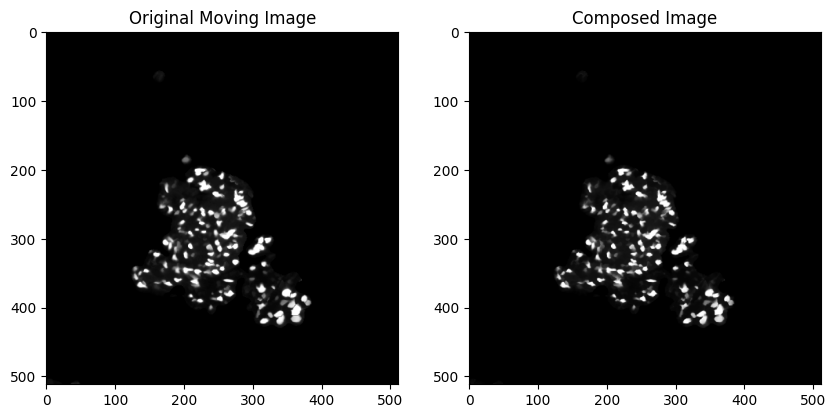

In [89]:
# Load the original moving image
original_moving = vxm.py.utils.load_volfile(mov_file, add_batch_axis=True, add_feat_axis=True)

# Remove the batch and feature axes
original_moving = np.squeeze(original_moving)
composed_moved_np = np.squeeze(composed_moved_np)

# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original moving image and the composed image
axs[0].imshow(original_moving, cmap='gray')
axs[1].imshow(composed_moved_np, cmap='gray')

# Set the titles
axs[0].set_title('Original Moving Image')
axs[1].set_title('Composed Image')

for ax in axs.flat:
    ax.grid(False)

plt.show()

In [90]:
#Calculate ncc between original moving image and composed image
calculate_ncc(original_moving.ravel(), composed_moved_np.ravel())

array([0.9893897], dtype=float32)

In [ ]:
#Calculate ncc of the composed image and the original_moving
ncc_val=calculate_ncc(original_moving.ravel(), composed_moved_np.ravel())
ncc_val

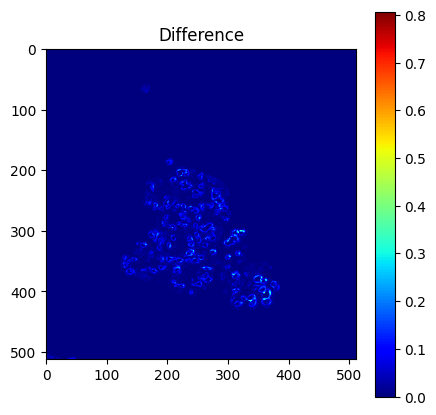

In [91]:
# Compute the difference between the original moving image and the composed image
difference = np.abs(original_moving - composed_moved_np)

# Create a new figure
fig, ax = plt.subplots(figsize=(5, 5))

# Display the difference
cax = ax.imshow(difference, cmap='jet')
fig.colorbar(cax)

# Set the title
ax.set_title('Difference')
ax.grid(False)

plt.show()

In [92]:
# Multiply warp1 and warp2
resulting_warp = warp1 * warp2

# Remove the batch and feature axes
resulting_warp = np.squeeze(resulting_warp)


In [93]:
resulting_warp.shape

(2, 512, 512)

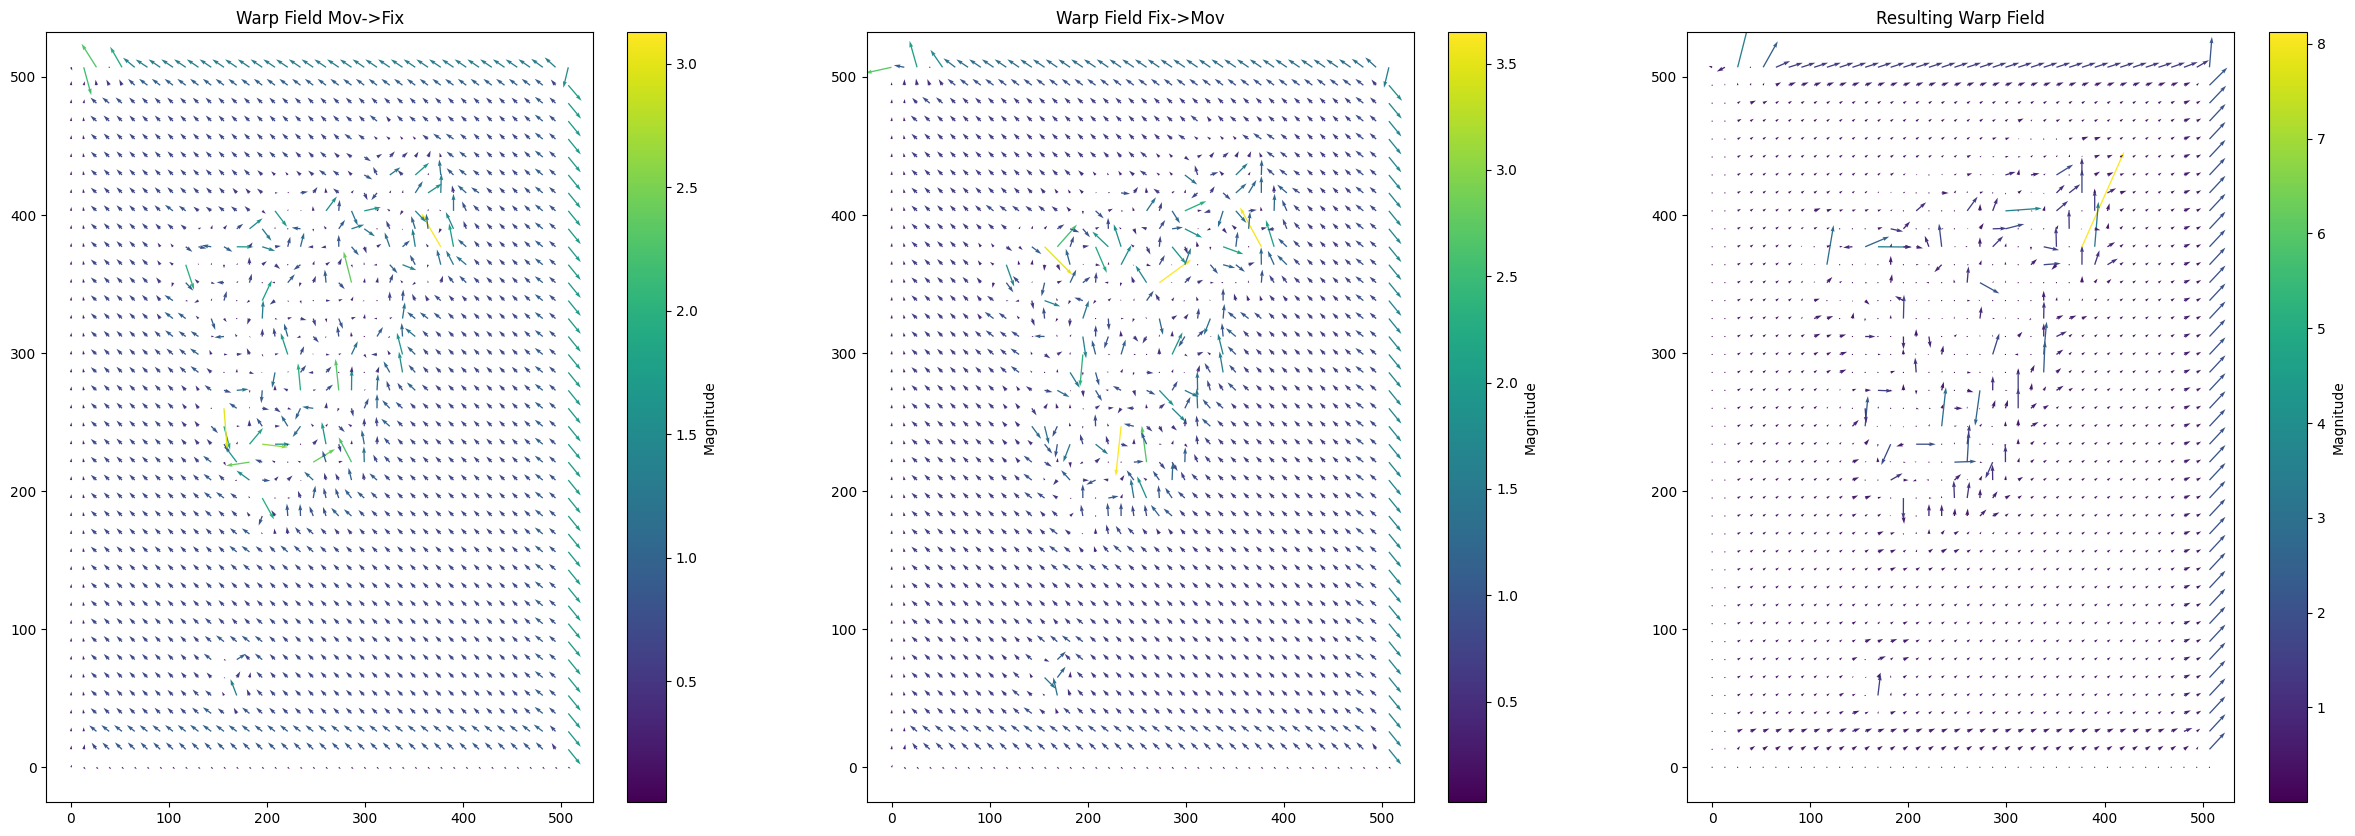

In [94]:
# Extract the x and y components of the warp fields
warp_x1 = warp1[0, 0, :, :]
warp_y1 = warp1[0, 1, :, :]
warp_x2 = warp2[0, 0, :, :]
warp_y2 = warp2[0, 1, :, :]
resulting_warp_x = resulting_warp[0, :, :]
resulting_warp_y = resulting_warp[1, :, :]

# Create a grid of points
x, y = np.meshgrid(np.arange(warp_x1.shape[1]), np.arange(warp_x1.shape[0]))

# Subsample the data
subsample = 13
x = x[::subsample, ::subsample]
y = y[::subsample, ::subsample]
warp_x1 = warp_x1[::subsample, ::subsample]
warp_y1 = warp_y1[::subsample, ::subsample]
warp_x2 = warp_x2[::subsample, ::subsample]
warp_y2 = warp_y2[::subsample, ::subsample]
resulting_warp_x = resulting_warp_x[::subsample, ::subsample]
resulting_warp_y = resulting_warp_y[::subsample, ::subsample]

# Calculate the magnitudes of the warp fields
magnitude1 = np.sqrt(warp_x1**2 + warp_y1**2)
magnitude2 = np.sqrt(warp_x2**2 + warp_y2**2)
resulting_magnitude = np.sqrt(resulting_warp_x**2 + resulting_warp_y**2)

# Create a new figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Display the warp fields as quiver plots
quiver1 = axs[0].quiver(x, y, warp_x1, warp_y1, magnitude1, angles='xy', scale_units='xy', scale=0.1)
quiver2 = axs[1].quiver(x, y, warp_x2, warp_y2, magnitude2, angles='xy', scale_units='xy', scale=0.1)
quiver3 = axs[2].quiver(x, y, resulting_warp_x, resulting_warp_y, resulting_magnitude, angles='xy', scale_units='xy', scale=0.1)

# Add colorbars
fig.colorbar(quiver1, ax=axs[0], label='Magnitude')
fig.colorbar(quiver2, ax=axs[1], label='Magnitude')
fig.colorbar(quiver3, ax=axs[2], label='Magnitude')

# Set the titles
axs[0].set_title('Warp Field Mov->Fix')
axs[1].set_title('Warp Field Fix->Mov')
axs[2].set_title('Resulting Warp Field')

plt.show()

In [95]:
warp_neg= -warp1 * warp1
warp_neg.shape

(1, 2, 512, 512)

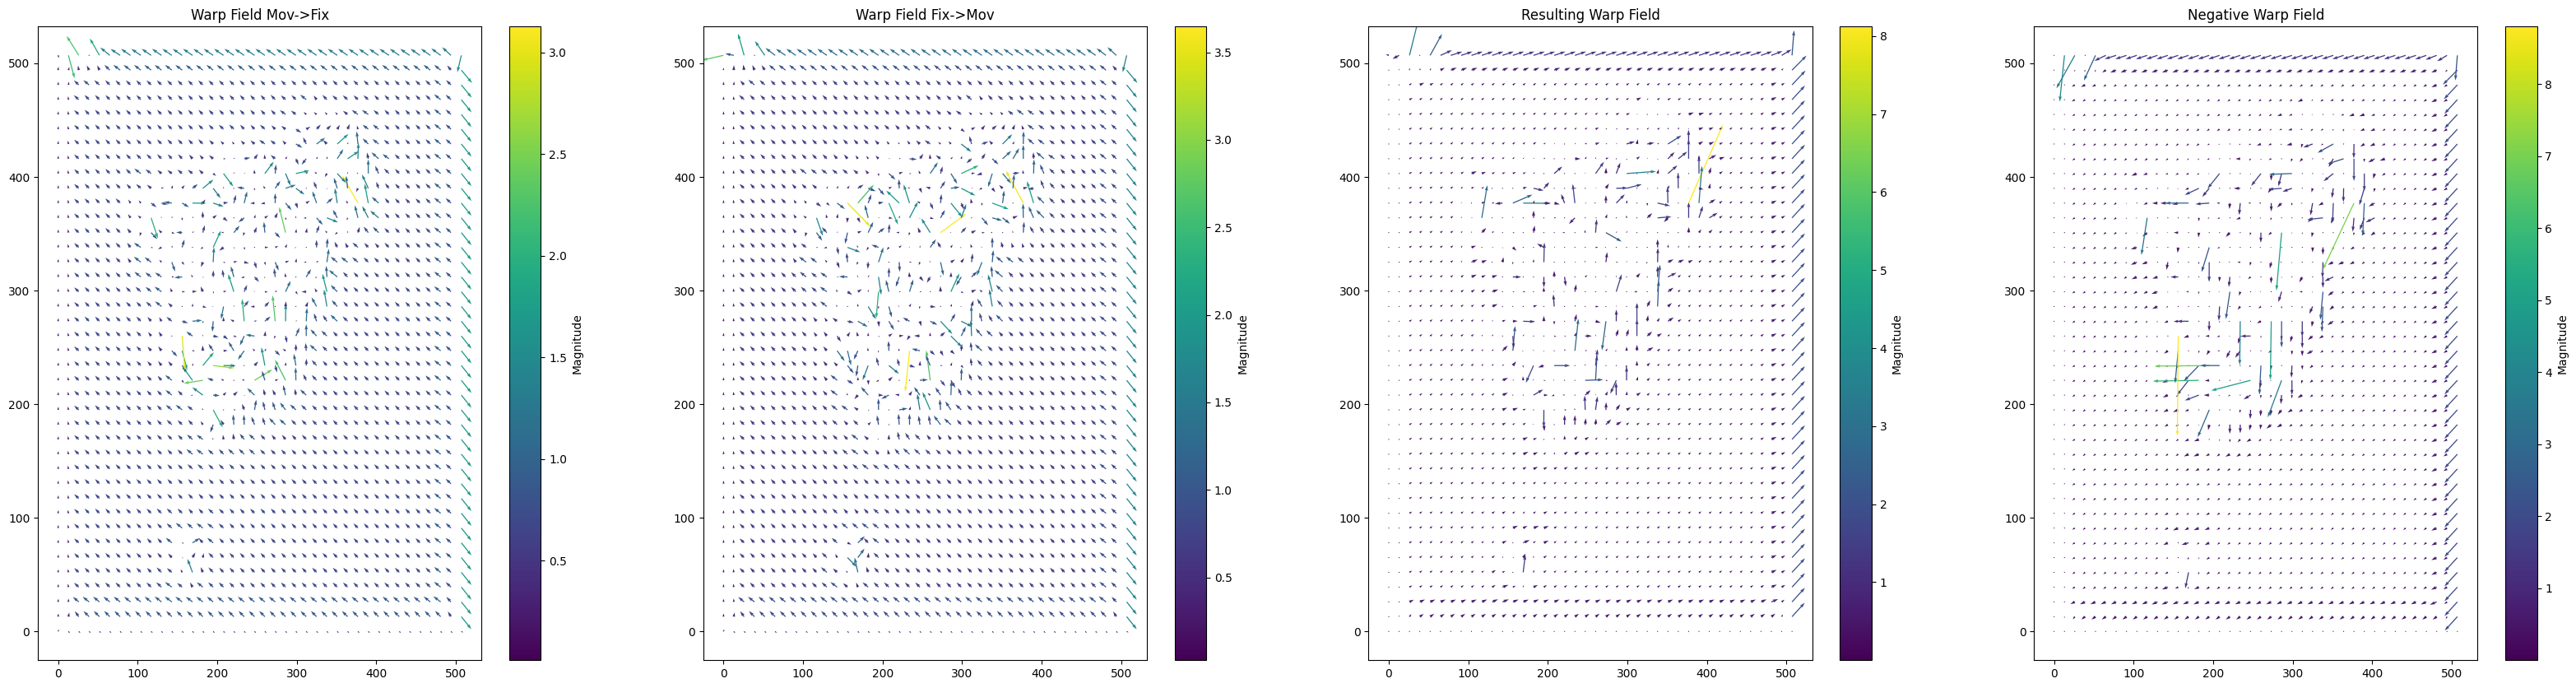

In [96]:
# Extract the x and y components of warp_neg
warp_neg_x = warp_neg[0, 0, :, :]
warp_neg_y = warp_neg[0, 1, :, :]

# Subsample warp_neg
warp_neg_x = warp_neg_x[::subsample, ::subsample]
warp_neg_y = warp_neg_y[::subsample, ::subsample]

# Calculate the magnitude of warp_neg
magnitude_neg = np.sqrt(warp_neg_x**2 + warp_neg_y**2)

# Create a new figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(40, 10))

# Display the warp fields as quiver plots
quiver1 = axs[0].quiver(x, y, warp_x1, warp_y1, magnitude1, angles='xy', scale_units='xy', scale=0.1)
quiver2 = axs[1].quiver(x, y, warp_x2, warp_y2, magnitude2, angles='xy', scale_units='xy', scale=0.1)
quiver3 = axs[2].quiver(x, y, resulting_warp_x, resulting_warp_y, resulting_magnitude, angles='xy', scale_units='xy', scale=0.1)
quiver_neg = axs[3].quiver(x, y, warp_neg_x, warp_neg_y, magnitude_neg, angles='xy', scale_units='xy', scale=0.1)

# Add colorbars
fig.colorbar(quiver1, ax=axs[0], label='Magnitude')
fig.colorbar(quiver2, ax=axs[1], label='Magnitude')
fig.colorbar(quiver3, ax=axs[2], label='Magnitude')
fig.colorbar(quiver_neg, ax=axs[3], label='Magnitude')

# Set the titles
axs[0].set_title('Warp Field Mov->Fix')
axs[1].set_title('Warp Field Fix->Mov')
axs[2].set_title('Resulting Warp Field')
axs[3].set_title('Negative Warp Field')

plt.show()